In [47]:
# Import pustaka untuk manipulasi data & menyimpan
import pandas as pd
import numpy as np
import time
import joblib

# Import pustaka untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Import pustaka Machine Learning (Scikit-Learn)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Mengatur gaya visualisasi agar lebih rapi
sns.set(style="whitegrid")

In [48]:
# Memuat data menggunakan relative path (pastikan file satu folder dengan notebook)
# Tidak menggunakan path absolut (seperti C:/Users/...) agar bisa jalan di komputer lain
df = pd.read_csv('transfusion.data')

# Mengganti nama kolom agar lebih singkat dan mudah dipanggil
df.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Target']

# Menampilkan 5 data teratas
df.head()

,Recency,Frequency,Monetary,Time,Target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [49]:
# Melihat informasi tipe data dan apakah ada data kosong
print("Info Dataset:")
df.info()

print("\nStatistik Deskriptif:")
# Melihat rata-rata, min, max, dll
df.describe()

Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Recency    748 non-null    int64
 1   Frequency  748 non-null    int64
 2   Monetary   748 non-null    int64
 3   Time       748 non-null    int64
 4   Target     748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB

Statistik Deskriptif:


,Recency,Frequency,Monetary,Time,Target
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


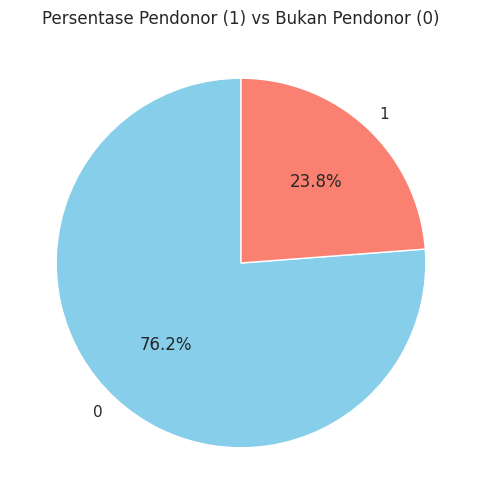

In [50]:
# Visualisasi 1: Melihat keseimbangan data Target (Donor vs Tidak)
plt.figure(figsize=(6, 6))
df['Target'].value_counts().plot.pie(autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Persentase Pendonor (1) vs Bukan Pendonor (0)')
plt.ylabel('')
plt.show()

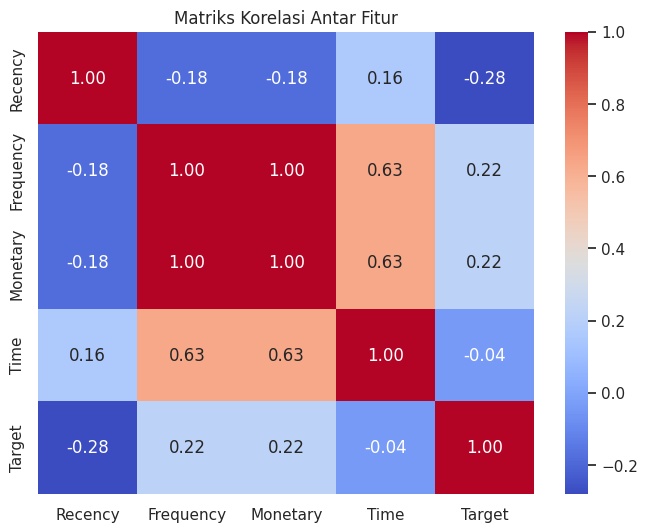

In [51]:
# Visualisasi 2: Melihat hubungan (korelasi) antar variabel
plt.figure(figsize=(8, 6))
# Menghitung korelasi
corr = df.corr()
# Menggambar heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi Antar Fitur')
plt.show()

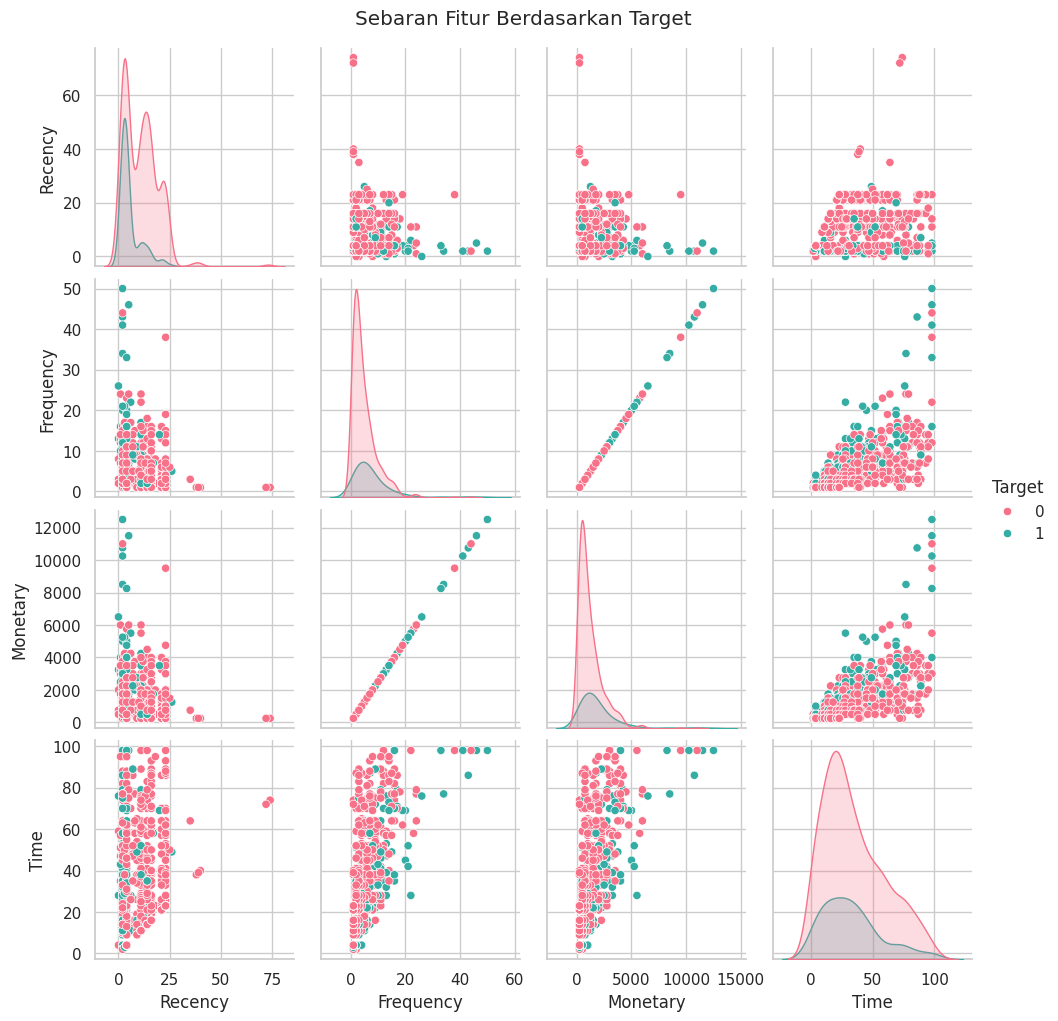

In [52]:
# Visualisasi 3: Melihat sebaran data tiap fitur berdasarkan Target
# Ini membantu melihat apakah ada pola pemisah yang jelas antar kelas
sns.pairplot(df, hue='Target', palette='husl', diag_kind='kde')
plt.suptitle('Sebaran Fitur Berdasarkan Target', y=1.02)
plt.show()

In [53]:
# Memisahkan Fitur (X) dan Target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Membagi data menjadi Data Latih (70%) dan Data Uji (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaling (Standarisasi) Data
# Penting untuk KNN dan Neural Network agar skala angka seimbang
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data siap! Ukuran Training: {X_train.shape}, Ukuran Testing: {X_test.shape}")

Data siap! Ukuran Training: (523, 4), Ukuran Testing: (225, 4)


In [54]:
print("--- Training Model KNN ---")
start = time.time()

# Membuat model KNN dengan 5 tetangga terdekat
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Prediksi
knn_pred = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, knn_pred)
knn_time = time.time() - start

# Print Hasil Evaluasi
print(f"Akurasi KNN: {knn_acc:.4f}")
print("Waktu Training: {:.4f} detik".format(knn_time))
print("\nClassification Report:\n", classification_report(y_test, knn_pred))

joblib.dump(knn, 'model_knn.pkl')
print("Model KNN berhasil diekspor ke 'model_knn.pkl'")

--- Training Model KNN ---
Akurasi KNN: 0.7244
Waktu Training: 0.0084 detik

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       165
           1       0.47      0.27      0.34        60

    accuracy                           0.72       225
   macro avg       0.62      0.58      0.58       225
weighted avg       0.69      0.72      0.70       225

Model KNN berhasil diekspor ke 'model_knn.pkl'


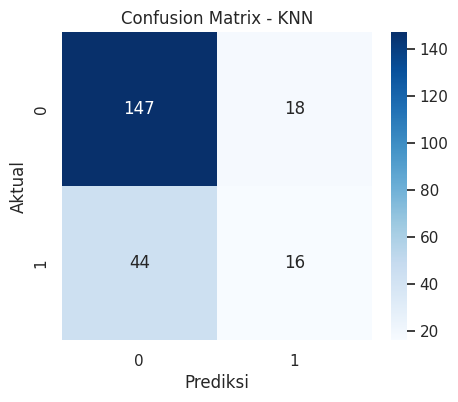

In [55]:
# Visualisasi hasil prediksi KNN
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

In [56]:
print("--- Training Model Random Forest ---")
start = time.time()

# Membuat model Random Forest (tidak wajib scaling, jadi pakai X_train biasa)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Prediksi
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_time = time.time() - start

# Print Hasil Evaluasi
print(f"Akurasi Random Forest: {rf_acc:.4f}")
print("Waktu Training: {:.4f} detik".format(rf_time))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))

joblib.dump(rf, 'model_rf.pkl')
print("Model Random Forest berhasil diekspor ke 'model_rf.pkl'")

--- Training Model Random Forest ---
Akurasi Random Forest: 0.7333
Waktu Training: 0.2969 detik

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       165
           1       0.50      0.27      0.35        60

    accuracy                           0.73       225
   macro avg       0.64      0.58      0.59       225
weighted avg       0.70      0.73      0.70       225

Model Random Forest berhasil diekspor ke 'model_rf.pkl'


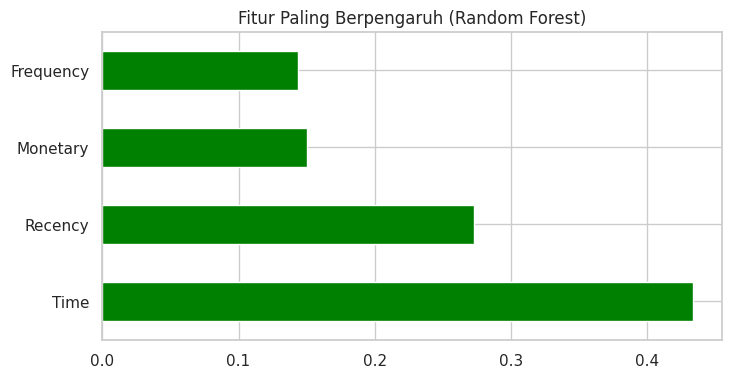

In [57]:
# Visualisasi Fitur Paling Penting menurut Random Forest
plt.figure(figsize=(8, 4))
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='green')
plt.title('Fitur Paling Berpengaruh (Random Forest)')
plt.show()

In [58]:
print("--- Training Model Deep Learning (MLP) ---")
start = time.time()

# Membuat model MLP (Multi-Layer Perceptron)
# hidden_layer_sizes=(32, 16) berarti 2 layer tersembunyi
dl = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1000, random_state=42)
dl.fit(X_train_scaled, y_train)

# Prediksi
dl_pred = dl.predict(X_test_scaled)
dl_acc = accuracy_score(y_test, dl_pred)
dl_time = time.time() - start

# Print Hasil Evaluasi
print(f"Akurasi Deep Learning: {dl_acc:.4f}")
print("Waktu Training: {:.4f} detik".format(dl_time))
print("\nClassification Report:\n", classification_report(y_test, dl_pred))

joblib.dump(dl, 'model_deeplearning.pkl')
print("Model Deep Learning berhasil diekspor ke 'model_deeplearning.pkl'")

--- Training Model Deep Learning (MLP) ---
Akurasi Deep Learning: 0.7733
Waktu Training: 0.5787 detik

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.93      0.86       165
           1       0.65      0.33      0.44        60

    accuracy                           0.77       225
   macro avg       0.72      0.63      0.65       225
weighted avg       0.75      0.77      0.75       225

Model Deep Learning berhasil diekspor ke 'model_deeplearning.pkl'


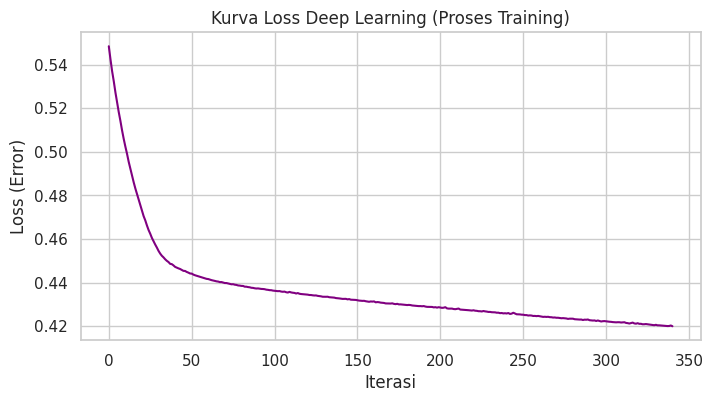

In [59]:
# Visualisasi Kurva Loss untuk melihat proses belajar model
# Jika grafik menurun, berarti model berhasil belajar (konvergen)
plt.figure(figsize=(8, 4))
plt.plot(dl.loss_curve_, color='purple')
plt.title('Kurva Loss Deep Learning (Proses Training)')
plt.xlabel('Iterasi')
plt.ylabel('Loss (Error)')
plt.show()

--- HASIL AKHIR PERBANDINGAN ---
           Model  Accuracy  Training Time (s)
2  Deep Learning  0.773333           0.578733
1  Random Forest  0.733333           0.296876
0            KNN  0.724444           0.008360


/tmp/ipython-input-2501523047.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


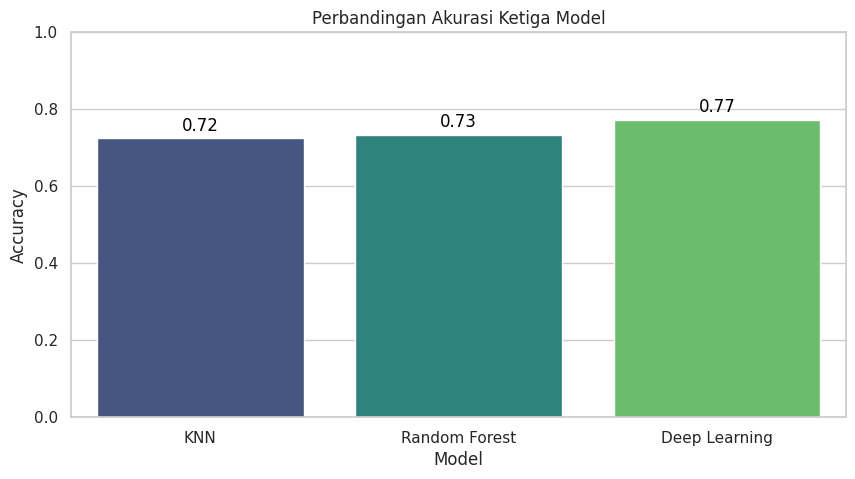

In [60]:
# Membuat DataFrame untuk merangkum hasil
results = pd.DataFrame({
    'Model': ['KNN', 'Random Forest', 'Deep Learning'],
    'Accuracy': [knn_acc, rf_acc, dl_acc],
    'Training Time (s)': [knn_time, rf_time, dl_time]
})

# Menampilkan Tabel
print("--- HASIL AKHIR PERBANDINGAN ---")
print(results.sort_values(by='Accuracy', ascending=False))

# Visualisasi Perbandingan Akurasi
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.title('Perbandingan Akurasi Ketiga Model')
plt.ylim(0, 1.0)
for index, row in results.iterrows():
    plt.text(index, row.Accuracy + 0.02, f"{row.Accuracy:.2f}", ha='center', color='black')
plt.show()